# h2 in NPC and neuron
- 11/30/2023 for revision
- GCTA cish2 estimation of matching samples in Jason Stein's NPC and neuron single cell data

In [1]:
library(tidyverse)
library(data.table)

── Attaching packages ─────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [3]:
pg <- read.table("../data/prolif_unrelated.csv", header = T, sep = ",")
head(pg)

,gene,cis_var,trans_var,res_var,pheno_var,cis_h2,trans_h2,cis_se,trans_se,res_se,pheno_se,cis_h2_se,trans_h2_se,p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,6.566131e+02,1063.908428,18786.692750,2.050721e+04,0.032019,0.051880,6120.549287,39447.06115,3.703905e+04,4842.088217,0.298314,1.917865,0.500000
2,ENSG00000000457,2.200758e+01,488.181977,3698.821938,4.209011e+03,0.005229,0.115985,725.548112,8171.51541,7.704047e+03,999.566839,0.172419,1.928101,0.500000
3,ENSG00000000460,7.445196e+01,4223.509051,15554.791229,1.985275e+04,0.003750,0.212742,3557.689809,39844.18919,3.748078e+04,4771.132110,0.179224,1.981087,0.500000
4,ENSG00000000938,1.180900e-02,0.044979,0.658248,7.150360e-01,0.016515,0.062904,0.115818,1.35151,1.281164e+00,0.169007,0.161613,1.883244,0.500000
5,ENSG00000000971,8.814060e-01,10.819835,197.431083,2.091323e+02,0.004215,0.051737,36.986985,397.16876,3.744060e+02,49.223297,0.176843,1.893502,0.500000
6,ENSG00000001036,1.513078e+05,27758.429866,58549.922382,2.376162e+05,0.636774,0.116820,87518.344851,407505.44689,3.815086e+05,62252.651840,0.278065,1.703353,0.037786


In [4]:
neuron <- read.table("../data/diff_unrelated.csv", header = T, sep = ",")
head(neuron)

,gene,cis_var,trans_var,res_var,pheno_var,cis_h2,trans_h2,cis_se,trans_se,res_se,pheno_se,cis_h2_se,trans_h2_se,p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,37.272305,9238.059100,6.787353e+02,9.954067e+03,0.003744,0.928069,2.750460e+03,2.425477e+04,2.246671e+04,2.614494e+03,0.276317,2.281489,0.344120
2,ENSG00000000457,4981.660704,1027.344080,1.378361e+04,1.979262e+04,0.251693,0.051905,5.218355e+03,3.887836e+04,3.649746e+04,4.861357e+03,0.246532,1.958419,0.234730
3,ENSG00000000460,2779.129928,5765.939579,1.630891e+04,2.485398e+04,0.111818,0.231993,5.642848e+03,5.162816e+04,4.840018e+04,6.082602e+03,0.223762,2.048027,0.396180
4,ENSG00000000938,3.614225,1.336799,6.690109e+00,1.164113e+01,0.310470,0.114834,3.212262e+00,2.033180e+01,1.915370e+01,2.987941e+00,0.237304,1.735034,0.081616
5,ENSG00000000971,0.060199,0.643300,6.525883e+00,7.229382e+00,0.008327,0.088984,1.292767e+00,1.399992e+01,1.318785e+01,1.713371e+00,0.178774,1.926520,0.500000
6,ENSG00000001036,7212.951639,56034.397424,8.143921e+05,8.776394e+05,0.008219,0.063847,2.148096e+05,1.685533e+06,1.584101e+06,2.072601e+05,0.244704,1.913522,0.500000


In [5]:
dim(pg)
dim(neuron)

[1] 40475    14

[1] 45920    14

In [6]:
df <- pg %>% inner_join(neuron, by = "gene")
dim(df)

[1] 39571    27

In [7]:
head(df)

,gene,cis_var.x,trans_var.x,res_var.x,pheno_var.x,cis_h2.x,trans_h2.x,cis_se.x,trans_se.x,res_se.x,...,pheno_var.y,cis_h2.y,trans_h2.y,cis_se.y,trans_se.y,res_se.y,pheno_se.y,cis_h2_se.y,trans_h2_se.y,p.y
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000419,6.566131e+02,1063.908428,18786.692750,2.050721e+04,0.032019,0.051880,6120.549287,39447.06115,3.703905e+04,...,9.954067e+03,0.003744,0.928069,2.750460e+03,2.425477e+04,2.246671e+04,2.614494e+03,0.276317,2.281489,0.344120
2,ENSG00000000457,2.200758e+01,488.181977,3698.821938,4.209011e+03,0.005229,0.115985,725.548112,8171.51541,7.704047e+03,...,1.979262e+04,0.251693,0.051905,5.218355e+03,3.887836e+04,3.649746e+04,4.861357e+03,0.246532,1.958419,0.234730
3,ENSG00000000460,7.445196e+01,4223.509051,15554.791229,1.985275e+04,0.003750,0.212742,3557.689809,39844.18919,3.748078e+04,...,2.485398e+04,0.111818,0.231993,5.642848e+03,5.162816e+04,4.840018e+04,6.082602e+03,0.223762,2.048027,0.396180
4,ENSG00000000938,1.180900e-02,0.044979,0.658248,7.150360e-01,0.016515,0.062904,0.115818,1.35151,1.281164e+00,...,1.164113e+01,0.310470,0.114834,3.212262e+00,2.033180e+01,1.915370e+01,2.987941e+00,0.237304,1.735034,0.081616
5,ENSG00000000971,8.814060e-01,10.819835,197.431083,2.091323e+02,0.004215,0.051737,36.986985,397.16876,3.744060e+02,...,7.229382e+00,0.008327,0.088984,1.292767e+00,1.399992e+01,1.318785e+01,1.713371e+00,0.178774,1.926520,0.500000
6,ENSG00000001036,1.513078e+05,27758.429866,58549.922382,2.376162e+05,0.636774,0.116820,87518.344851,407505.44689,3.815086e+05,...,8.776394e+05,0.008219,0.063847,2.148096e+05,1.685533e+06,1.584101e+06,2.072601e+05,0.244704,1.913522,0.500000


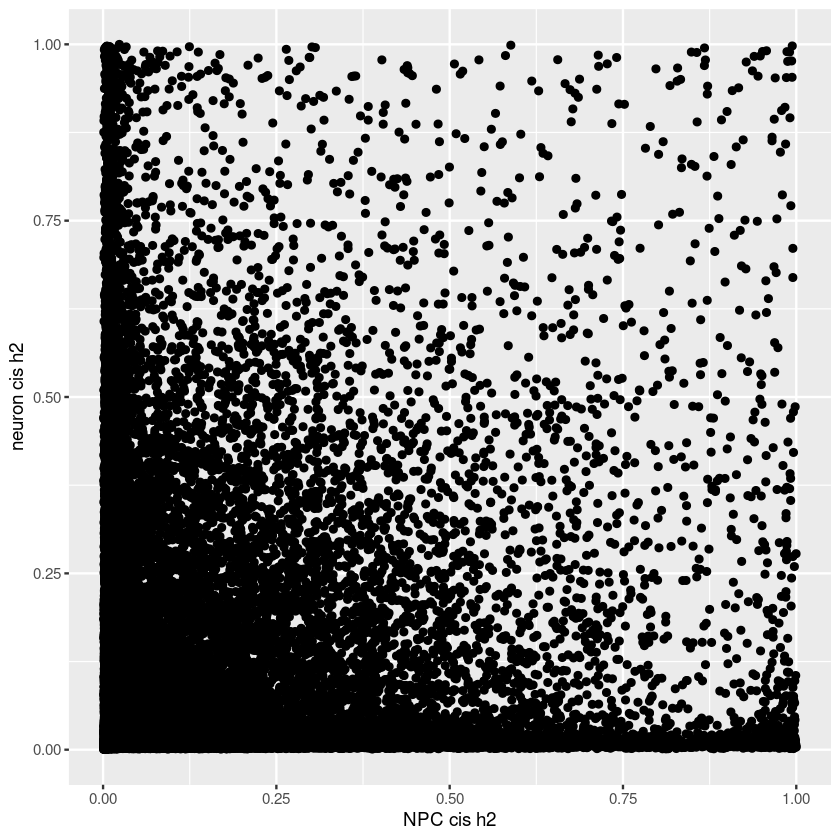

In [10]:
ggplot(df, aes(x = cis_h2.x, y = cis_h2.y)) +
    geom_point() +
    labs(x = "NPC cis h2", y = "neuron cis h2")

In [12]:
pg.shared <- pg %>% filter(gene %in% df$gene) %>% select(cis_h2) %>% mutate(Cell_type = "NPC")
neuron.shared <- neuron %>% filter(gene %in% df$gene) %>% select(cis_h2) %>% mutate(Cell_type = "neuron")

In [13]:
head(pg.shared)

,cis_h2,Cell_type
,<dbl>,<chr>
1,0.032019,NPC
2,0.005229,NPC
3,0.003750,NPC
4,0.016515,NPC
5,0.004215,NPC
6,0.636774,NPC


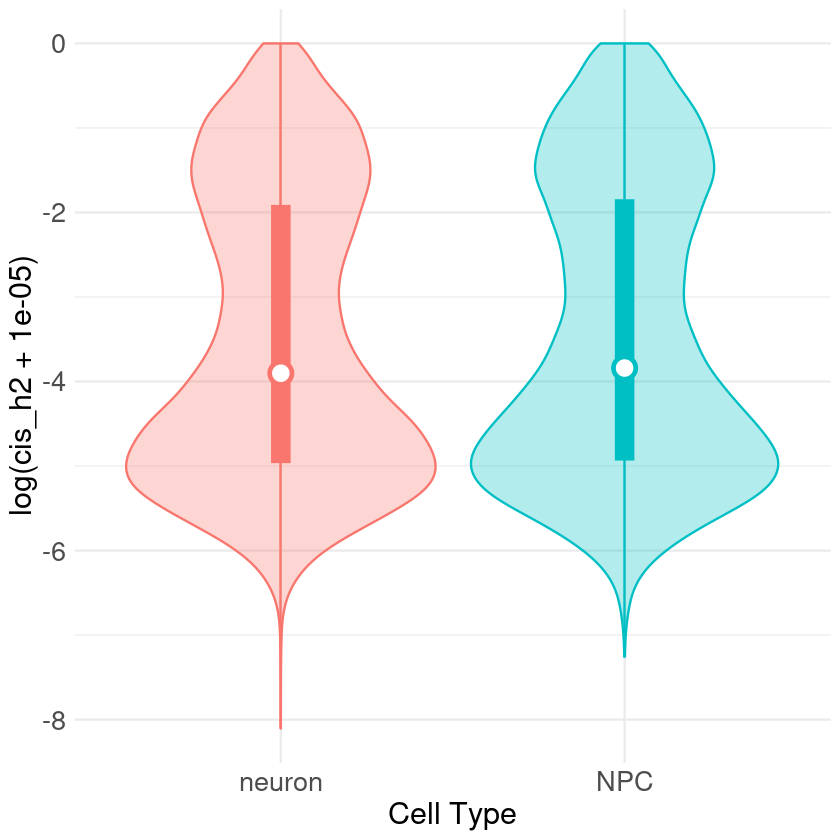

In [17]:
df1 <- rbind(pg.shared, neuron.shared)

ggplot(df1, aes(x = Cell_type, y = log(cis_h2 + 1e-5), fill = Cell_type, color = Cell_type)) +
    geom_violin(alpha = 0.3, trim = TRUE) +
    geom_boxplot(width = 0.05) +    
    labs(x = "Cell Type") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    stat_summary(fun = median, geom = "point", 
                 shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5)

In [ ]:
ggplot(h2, aes(x = Group, y = log(cish2 + 1e-5), fill = Group, color = Group)) +
    geom_violin(alpha = 0.3, trim = TRUE) +
    geom_boxplot(width = 0.05) +
#     labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    stat_summary(fun = median, geom = "point", 
                 shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester"),
                           c("First trimester", "Adult"),
                           c("Adult", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16", "Wilcoxon, p = 7.815e-08", "Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.1,
        color = "black"
  )